In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize':[10,6]})

In [40]:
data=pd.read_csv('wine-clustering.csv')

In [41]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [43]:
def scale(x):
    return ((x-np.mean(x))/np.std(x))

In [44]:
xtrain=scale(data)


In [45]:
xtrain

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


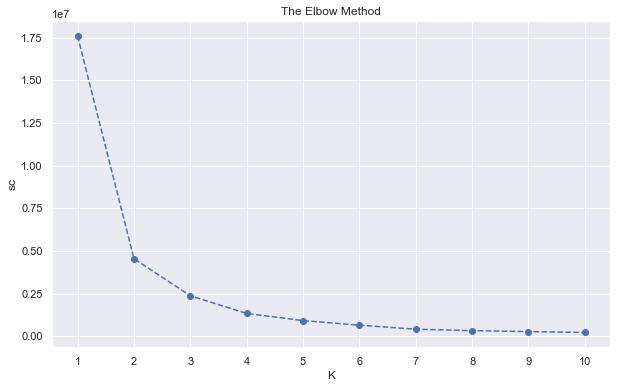

In [124]:
#applying elbow method to find optimal number of K clusters
sc = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 0)
    kmeans.fit(data)
    sc.append(np.abs(kmeans.score(data)))
plt.plot(list(range(1, 11)), sc,linestyle='--',marker='o')
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('sc')
plt.xticks(list(range(1, 11)))
plt.show()


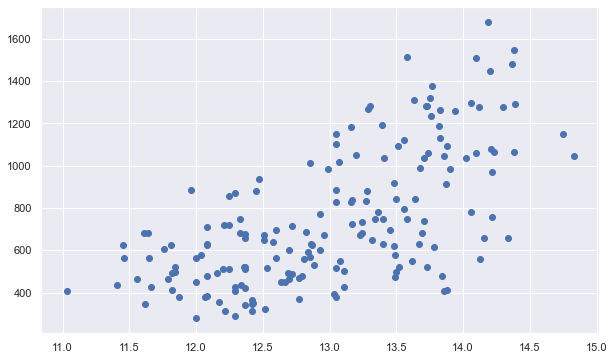

In [47]:
plt.scatter(data['Alcohol'],data['Proline'], label='True Position')

In [125]:
#applying k means alogrithm
#after applying elbow method we find that the best k is =3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [126]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

In [127]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [128]:
centroids

array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

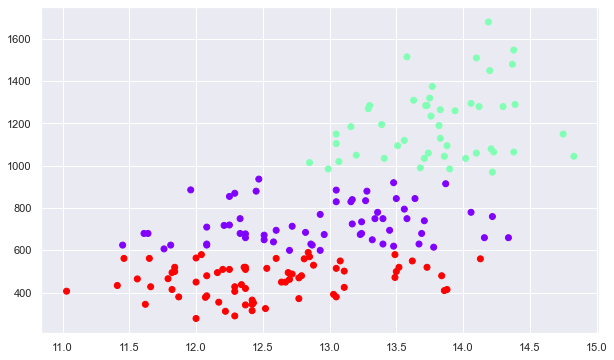

In [129]:
#plt.scatter(v[:m],v[m:], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(c[:m],c[m:], label='True Position')
plt.scatter(data['Alcohol'],data['Proline'], c=labels, cmap='rainbow')

*****

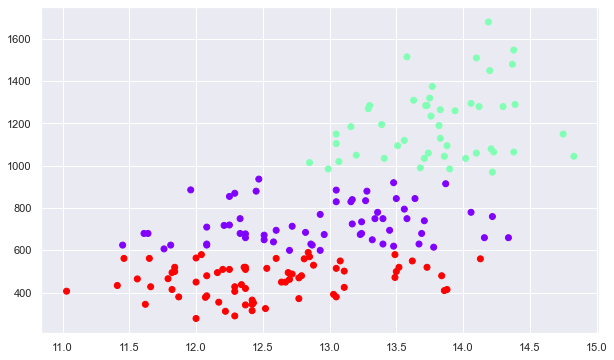

In [130]:
plt.scatter(data.iloc[:,0],data.iloc[:,-1],c=labels,cmap='rainbow' )


In [131]:
from mpl_toolkits.mplot3d import Axes3D

In [132]:
def plot_data(data, labels):
    
    fig = plt.figure();
    ax = Axes3D(fig)
    ax.scatter(data.iloc[:, 0], data.iloc[:,5], data.iloc[:, -1], c=labels, cmap='tab10');

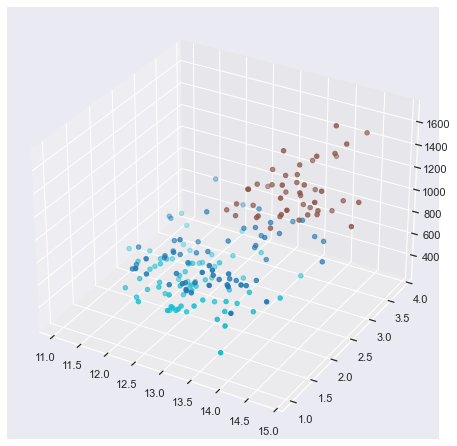

In [133]:
plot_data(data, labels)